# USA.gov data from Bitly

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()

%config InlineBackend.figure_format ='retina'

In [25]:
path = 'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/bitly_usagov/example.txt'
df = pd.read_json(path, lines=True)
df.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


Let's plot the most occuring time-zones.

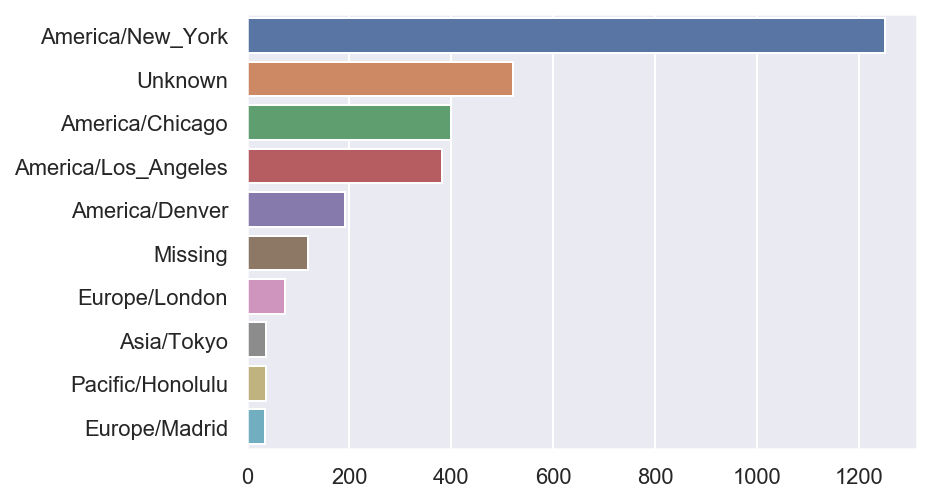

In [28]:
counts = df.tz.str.replace('^$', 'Unknown').fillna('Missing').value_counts()[:10]
sns.barplot(counts.values, counts.index);

Now, let's split the bars by operating system.

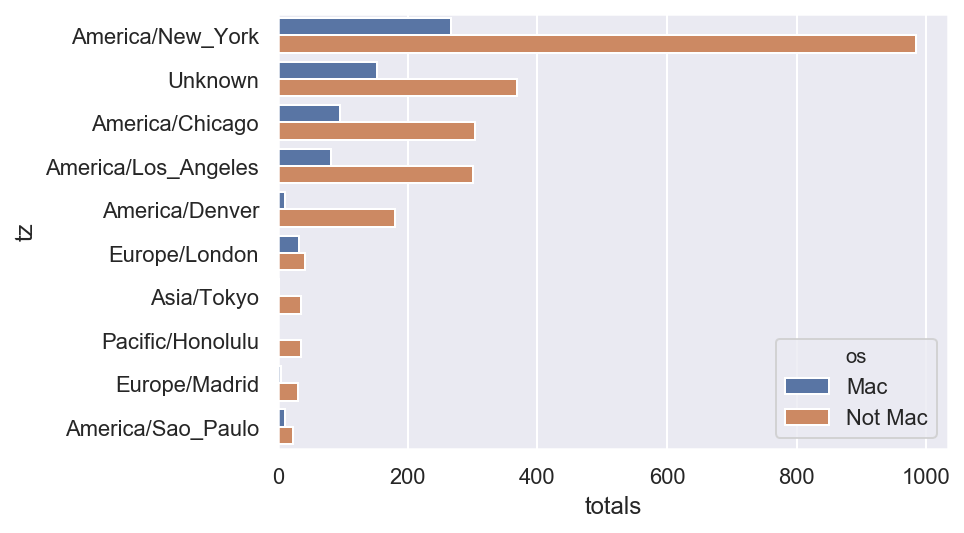

In [54]:
pd.Series.reverse = lambda self: self[::-1]  # Cool trick from here: https://stackoverflow.com/a/46624694

df['os'] = np.where(df.a.str.contains('Mac'), 'Mac', 'Not Mac')

agg_counts = (df.replace('^$', 'Unknown', regex=True)
              .groupby(['tz', 'os'])
              .size()
              .unstack()
              .fillna(0))

indexer = agg_counts.sum(1).argsort()
data = agg_counts.take(indexer[-10:]).reverse().stack()
data.name = 'totals'
data = data.reset_index()

sns.barplot(x='totals', y='tz', hue='os', data=data);

# MovieLens 1M dataset 

In [2]:
!ls data/ml-1m

README      movies.dat  ratings.dat users.dat


In [3]:
import pandas as pd

In [4]:
path = 'data/ml-1m/'

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table(path + 'users.dat', sep='::', engine='python', names=unames)

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table(path + 'ratings.dat', sep='::', engine='python', names=rnames)

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table(path + 'movies.dat', sep='::', engine='python', names=mnames)

data = pd.merge(pd.merge(users, ratings), movies)
data.head()

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


Calculate average ratings by gender

In [107]:
mean_ratings = data.pivot_table(values='rating', index='title',
                                columns='gender', aggfunc='mean')
mean_ratings.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


Keep only movies with at least 200 ratings

In [108]:
ratings_count = data.groupby('title').size()
active_titles = ratings_count[ratings_count > 200].index

mean_ratings = mean_ratings.loc[active_titles]
# mean_ratings = mean_ratings.reindex(active_titles)  # alternative

Above was mainly to practice, what I actually want is to exclude movies with fewer than 200 ratings from the very start

In [109]:
rating_count = data.groupby('title').size()
active_movies = rating_count[rating_count > 200].index
data = data[data.title.isin(active_movies)]
data.head()

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


Calculate ratings difference by gender (again, just for fun, and to compare to above result)

In [114]:
mean_ratings2 = data.pivot_table('rating', 'title', 'gender', 'mean')
all(mean_ratings2 == mean_ratings)

True

Look at top movis by gender

In [126]:
mean_ratings.sort_values('F', ascending=False).head()

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
"General, The (1927)",4.575758,4.329480
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075


In [127]:
mean_ratings.sort_values('M', ascending=False).head()

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248


Calculate rating differences

In [131]:
mean_ratings['diff'] = np.abs(mean_ratings['F'] - mean_ratings['M'])
mean_ratings.sort_values('diff', ascending=False).head()

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,0.830782
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"To Wong Foo, Thanks for Everything! Julie Newmar (1995)",3.486842,2.795276,0.691567
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Jumpin' Jack Flash (1986),3.254717,2.578358,0.676359


Find movies with the most rating disagreement among all viwers

In [137]:
data.groupby('title').rating.std().sort_values(ascending=False).head()

title
Plan 9 from Outer Space (1958)         1.455998
Texas Chainsaw Massacre, The (1974)    1.332448
Dumb & Dumber (1994)                   1.321333
Blair Witch Project, The (1999)        1.316368
Natural Born Killers (1994)            1.307198
Name: rating, dtype: float64

# Baby names

In [546]:
!head data/names/yob1880.txt

Mary,F,7065
Anna,F,2604
Emma,F,2003
Elizabeth,F,1939
Minnie,F,1746
Margaret,F,1578
Ida,F,1472
Alice,F,1414
Bertha,F,1320
Sarah,F,1288


In [547]:
import re

files = !ls data/names/yob*

pieces = []
columns = ['name', 'sex', 'births']

for file in files:
    frame = pd.read_csv(file, names=columns)
    
    year = int(re.findall('\d+', file)[0])
    frame['year'] = year
    pieces.append(frame)

names = pd.concat(pieces, ignore_index=True)
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [548]:
years = range(1880, 2019)

pieces = []
columns = ['name', 'gender', 'births']

for year in years:
    path = 'data/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

names = pd.concat(pieces, ignore_index=True)
names.head()

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


Plot number of girls and boys born over time

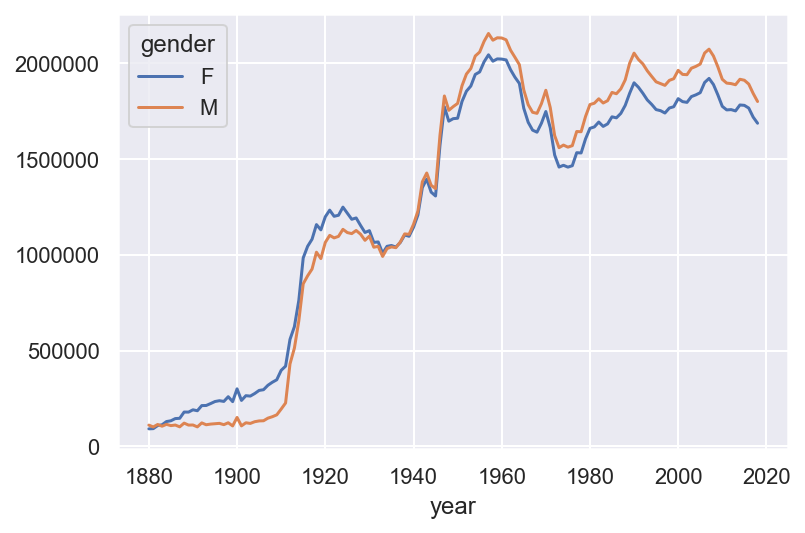

In [549]:
names.pivot_table('births', 'year', 'gender', 'sum').plot();

Add a proportion column

In [550]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group

names = names.groupby(['gender', 'year']).apply(add_prop)
names.head()

,name,gender,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


Check that prop sums to 1 for each year-gender group

In [551]:
names.groupby(['gender', 'year']).prop.sum()

gender  year
F       1880    1.0
        1881    1.0
        1882    1.0
        1883    1.0
        1884    1.0
               ... 
M       2014    1.0
        2015    1.0
        2016    1.0
        2017    1.0
        2018    1.0
Name: prop, Length: 278, dtype: float64

Keep only top 1000 names per gender and year

In [552]:
def top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

top1000 = names.groupby(['gender', 'year']).apply(top1000).reset_index(drop=True)

Let's look at the number of births per year for common names

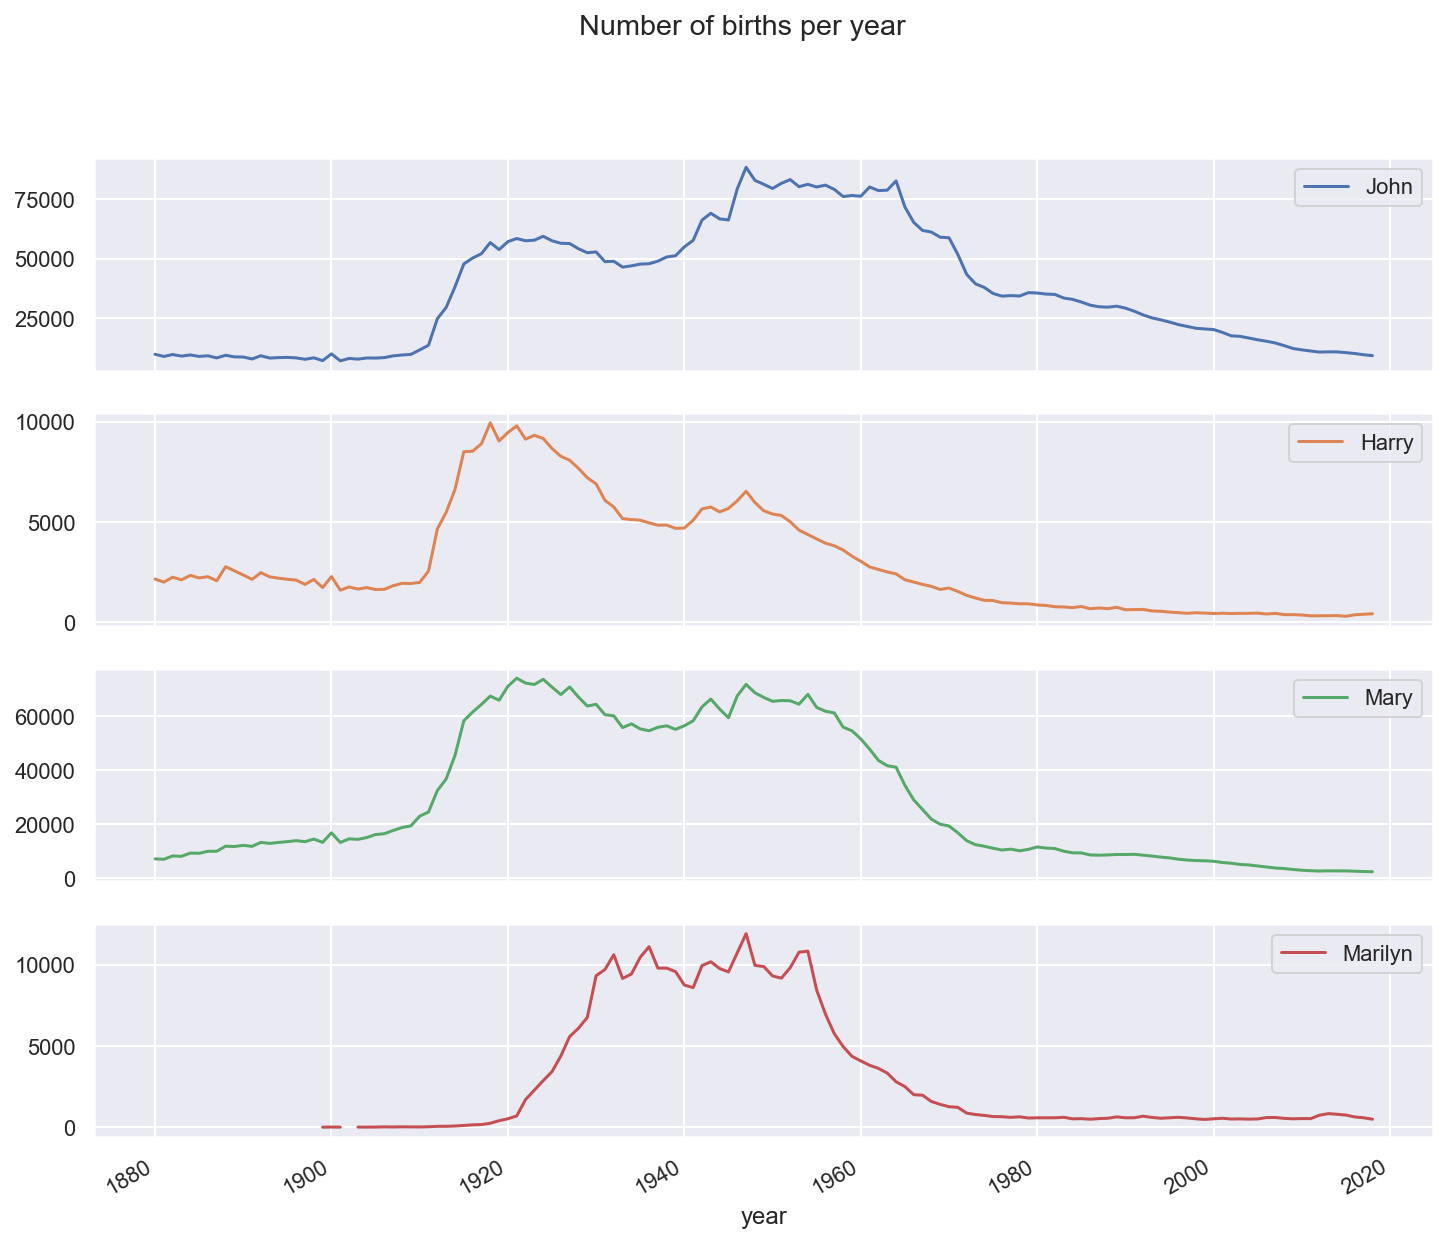

In [8]:
subset = ['John', 'Harry', 'Mary', 'Marilyn']

(names.pivot_table('births', 'year', 'name', 'sum')[subset]
 .plot(subplots=True, figsize=(12,10), title='Number of births per year'));

Plot suggest that common names have become less popular. This could be either because people use other names instead, or becasue people just use more names overall. Let's look into this. First by looking at the proportion of birhts for the top 1000 names.

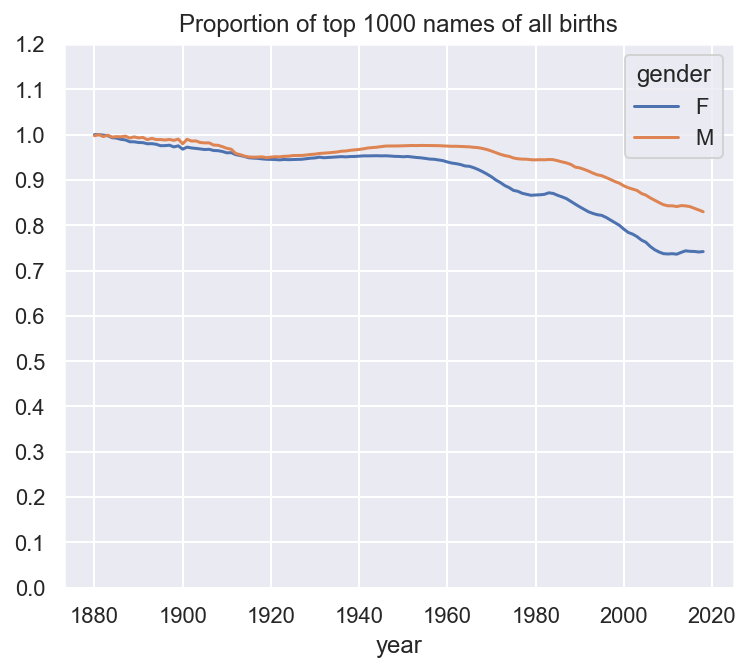

In [9]:
(top1000.pivot_table('prop', 'year', 'gender', 'sum')
 .plot(title='Proportion of top 1000 names of all births',
       figsize=(6, 5),
       yticks=np.linspace(0, 1.2, 13)));

It's clear from the above plot that the top 1000 names are becoming a smaller proportion of all names over time, indicating that naming diversity is increasing. To corroborate this, let's look at the number of names that account for 50 percent of all births in each year for each sex.

In [10]:
boys2018 = top1000[(top1000.year == 2018) & (top1000.gender == 'M')]
boys2018.sort_values('prop', ascending=False).prop.cumsum().searchsorted(.5) + 1

149

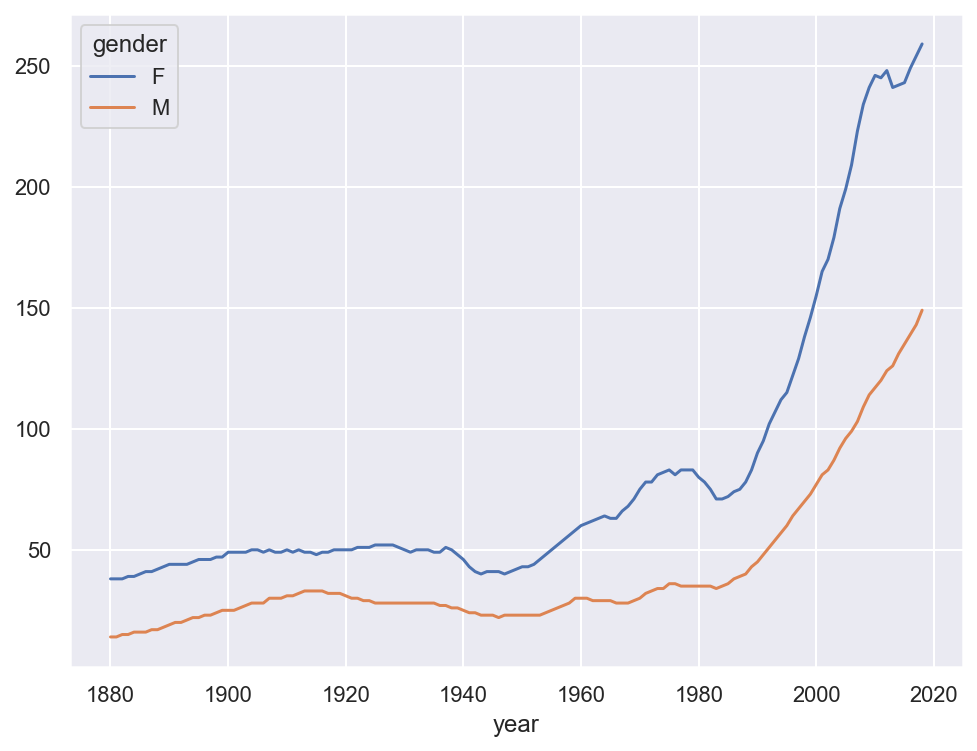

In [11]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values('prop', ascending=False)
    return group.prop.cumsum().searchsorted(.5) + 1

diversity = top1000.groupby(['gender', 'year']).apply(get_quantile_count).unstack(level=0)
diversity.plot(figsize=(8, 6));

Explore the last-letter revolution

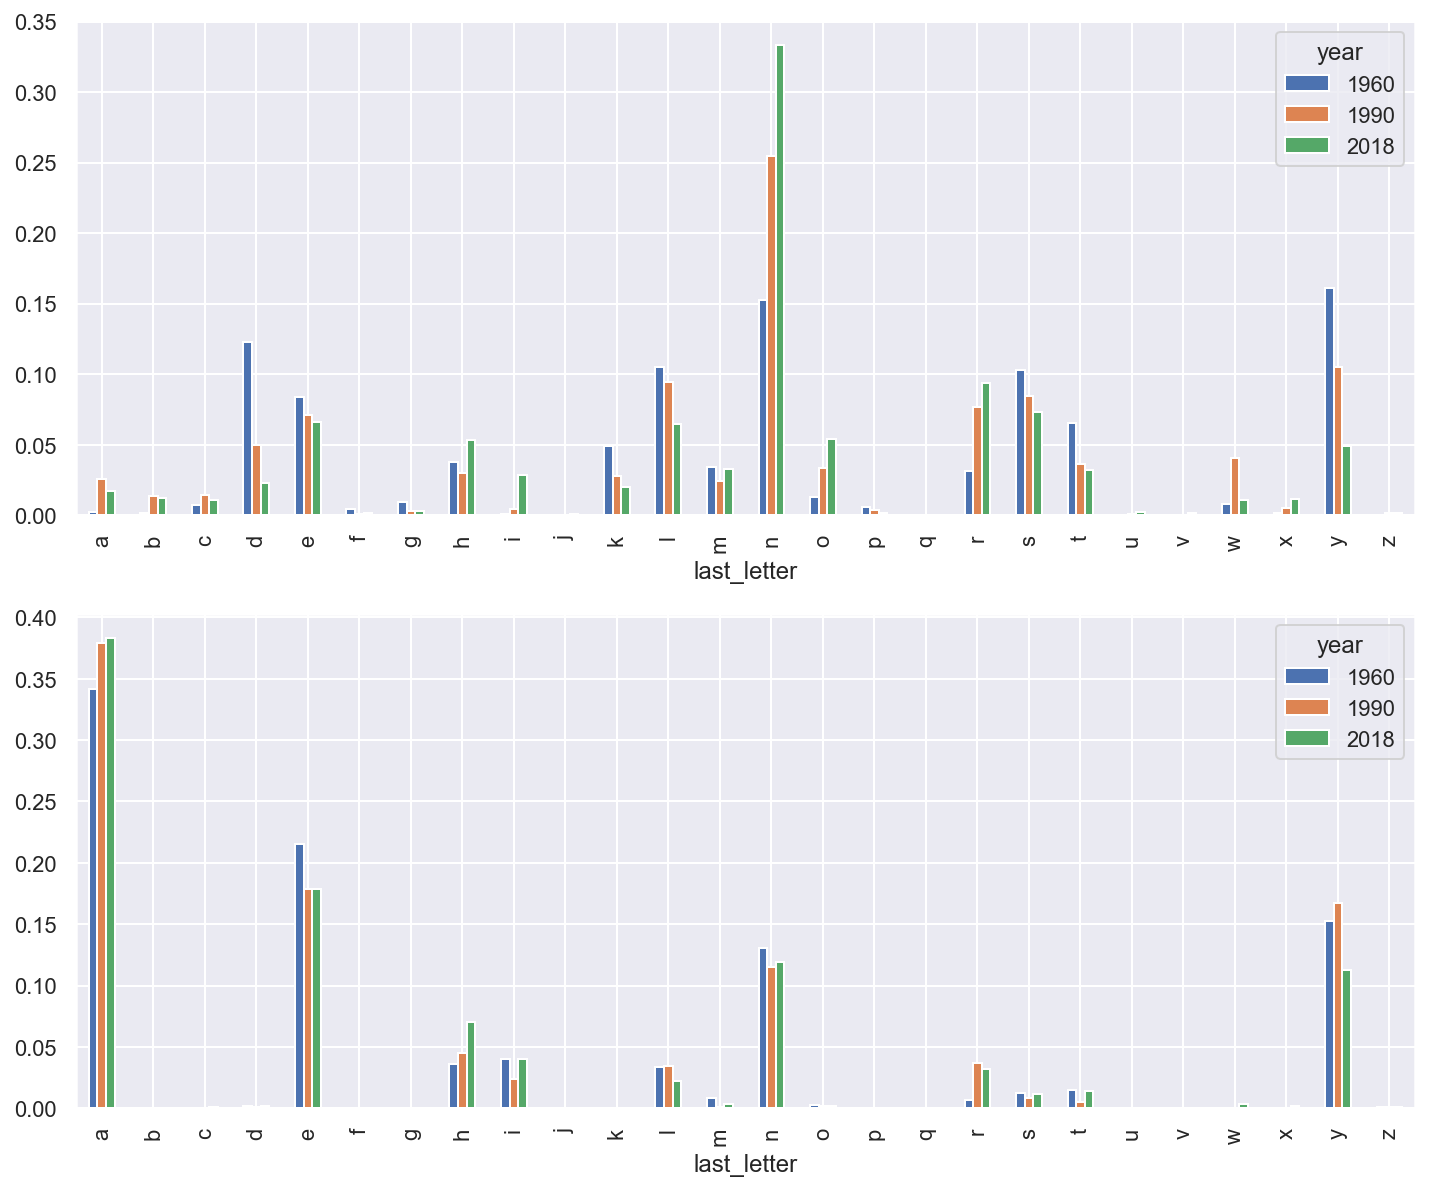

In [202]:
import matplotlib.pyplot as plt

def get_last_letter(name):
    return name[-1]

names['last_letter'] = names.name.map(get_last_letter)

table = names.pivot_table('births', 'last_letter', ['sex', 'year'], 'sum')

subtable = table.reindex(columns=[1960, 1990, 2018], level='year')
subtable = subtable / subtable.sum()
subtable

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,10))

subtable['M'].plot(kind='bar', ax=ax1)
subtable['F'].plot(kind='bar', ax=ax2);

For boys names, d, n, and y have changed markedly in popularity over the past six decads. Let's look at this more closely.

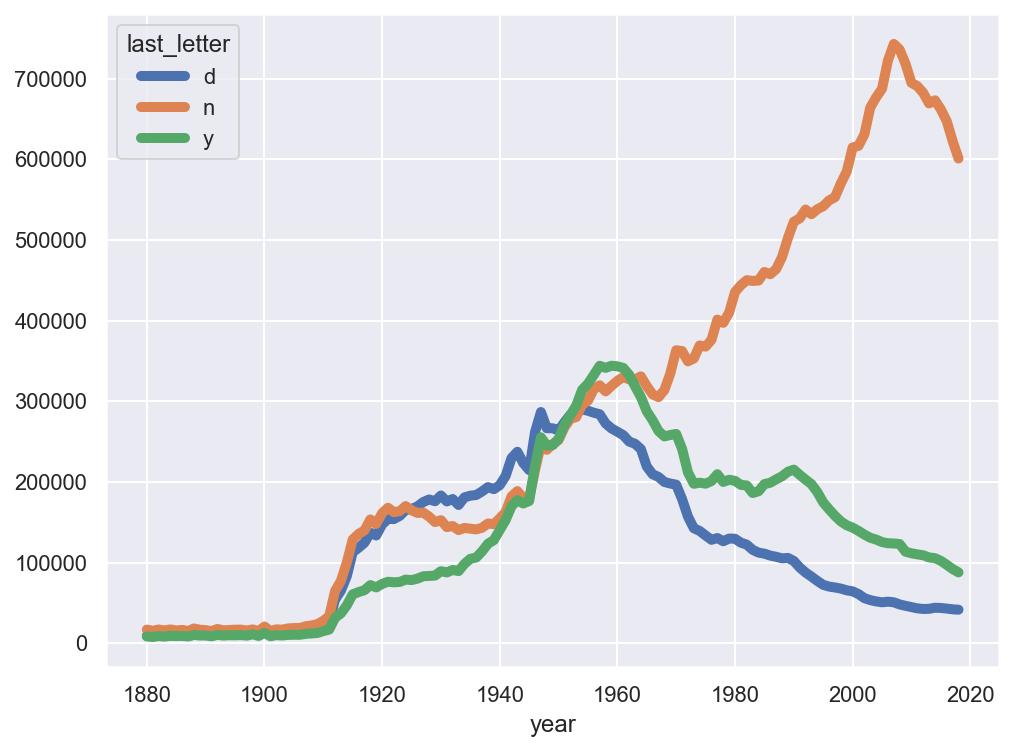

In [210]:
table['M'].reindex(['d', 'n', 'y']).T.plot(figsize=(8, 6), linewidth=5);

Leslie-like names have evolved from being boy to being girl names

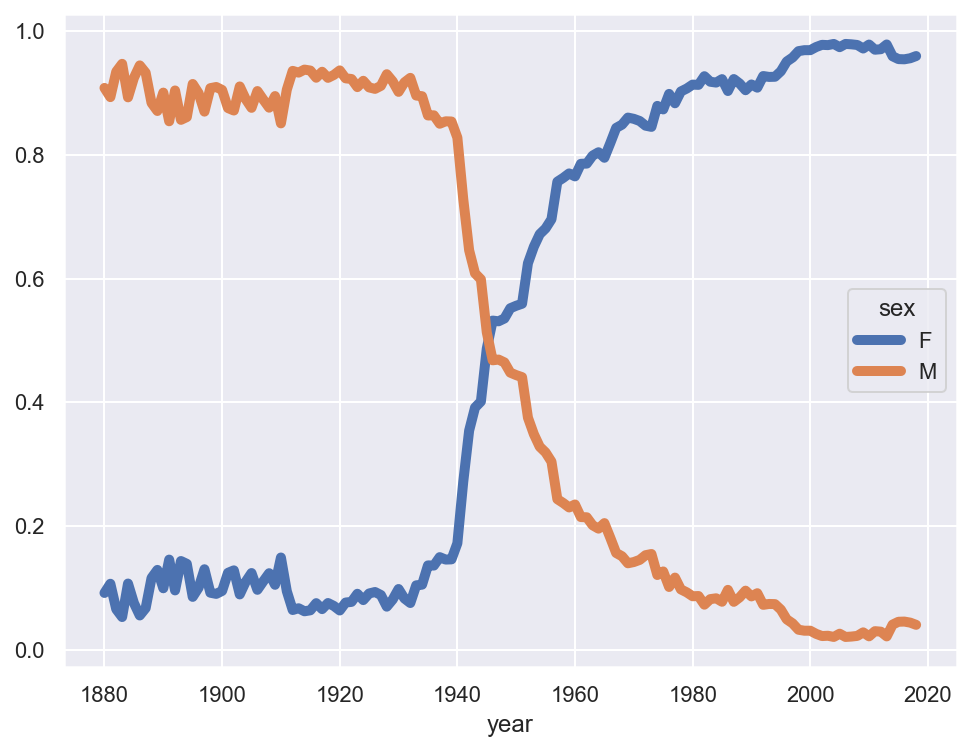

In [258]:
def normalise(df):
    return df.div(df.sum(1), axis='rows')

(names[names.name.str.lower().str.contains('^lesl')]
 .pivot_table('births', 'year', 'sex', 'sum')
 .pipe(normalise)
 .plot(figsize=(8, 6), linewidth=5));

Evolution of Molly and Fabian

In [274]:
names

,name,sex,births,year,last_letter
0,Mary,F,7065,1880,y
1,Anna,F,2604,1880,a
2,Emma,F,2003,1880,a
3,Elizabeth,F,1939,1880,h
4,Minnie,F,1746,1880,e
...,...,...,...,...,...
1957041,Zylas,M,5,2018,s
1957042,Zyran,M,5,2018,n
1957043,Zyrie,M,5,2018,e
1957044,Zyron,M,5,2018,n


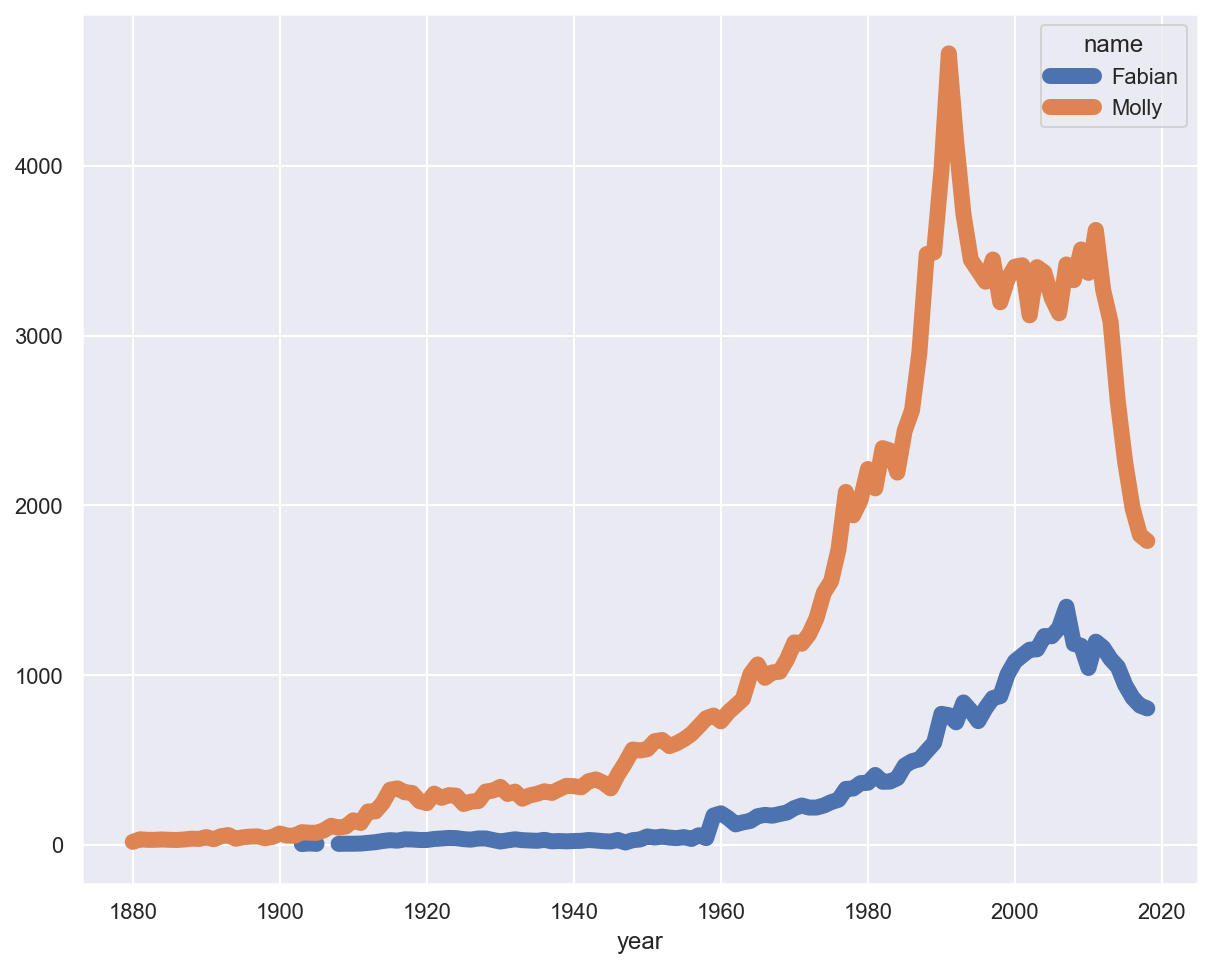

In [296]:
(names[names.name.isin(['Molly', 'Fabian'])]
 .pivot_table('births', 'year', 'name', 'sum')
 .plot(figsize=(10, 8), linewidth=8));

# CH baby names

In [73]:
ls data/ch-names/

f.xlsx  m.xlsx


In [84]:
genders = ['f', 'm']

def rename_cols(df, names):
    df.columns = names
    return df

pieces = []
columns = ['name', 'year', 'births', 'rank']

for gender in genders:    
    path = 'data/ch-names/%s.xlsx' % gender
    data = (pd.read_excel(path, header=[2, 3], index_col=0, skipfooter=5)
         .stack(level=0)
         .reset_index()
         .pipe(rename_cols, columns)
         .assign(gender=gender))
    
    pieces.append(data)

names = pd.concat(pieces, ignore_index=True)
names

,name,year,births,rank,gender
0,Emma,1998,88,78,f
1,Emma,1999,80,85,f
2,Emma,2000,127,46,f
3,Emma,2001,116,46,f
4,Emma,2002,147,36,f
...,...,...,...,...,...
41995,Rúben,2014,5,1071,m
41996,Rúben,2015,4,1263,m
41997,Rúben,2016,6,972,m
41998,Rúben,2017,15,515,m


In [3]:
files = !ls data/ch-names/*

pieces = []
columns = ['name', 'year', 'births']

for file in files:    
    frame = (pd.read_excel(file, header=[2, 3], index_col=0, skipfooter=5)
             .stack(level=[0]).reset_index().drop('Rang', axis=1))

    frame.columns = columns
    gender = file[-6]
    frame['gender'] = gender 
    pieces.append(frame)
    
table = pd.concat(pieces, ignore_index=True) 
table.head()

,name,year,births,gender
0,Liam,1998,22,m
1,Liam,1999,30,m
2,Liam,2000,46,m
3,Liam,2001,37,m
4,Liam,2002,44,m


Add proportions and rank columns

In [4]:
def calc_prop(group):
    group['prop'] = group.births / group.births.sum() * 100
    return group

table = table.groupby(['year', 'gender']).apply(calc_prop)
table['rank'] = table.groupby(['year', 'gender']).births.rank(method='min')

Most popular names by year

In [20]:
def top_n(group, n=5):
    return group.sort_values('births', ascending=False)[:n]

num_names = 10
years = [1998]

(table.groupby(['year', 'gender'])
 .apply(top_n, num_names)
 .drop(['year', 'gender'], axis=1)
 .reset_index(level=2, drop=True)
 .loc[years])

name  births      prop    rank
year gender                                    
1998 m           Luca     648  2.214173  1000.0
     m          David     528  1.804141   999.0
     m          Simon     511  1.746053   998.0
     m          Marco     435  1.486366   997.0
     m           Joel     424  1.448780   996.0
     m        Michael     407  1.390692   995.0
     m          Lukas     392  1.339438   994.0
     m        Nicolas     375  1.281350   993.0
     m         Fabian     368  1.257432   992.0
     m          Kevin     350  1.195927   991.0
     w          Laura     607  2.405675  1000.0
     w         Celine     414  1.640774   999.0
     w          Sarah     407  1.613031   998.0
     w        Jessica     391  1.549620   997.0
     w            Lea     375  1.486208   996.0
     w       Michelle     357  1.414870   995.0
     w           Sara     344  1.363348   994.0
     w        Vanessa     320  1.268231   993.0
     w           Lara     308  1.220672   992.0
     w          Julia     299  1.185003   991.0

What's going on with girl names ending in 'a'?

In [805]:
table[table.name.str.endswith('a')]

0        False
1        False
2        False
3        False
4        False
         ...  
41995    False
41996    False
41997    False
41998    False
41999    False
Name: name, Length: 42000, dtype: bool

In [7]:
girl_names = ['Emma', 'Ivy', 'Audrey', 'Vivien']

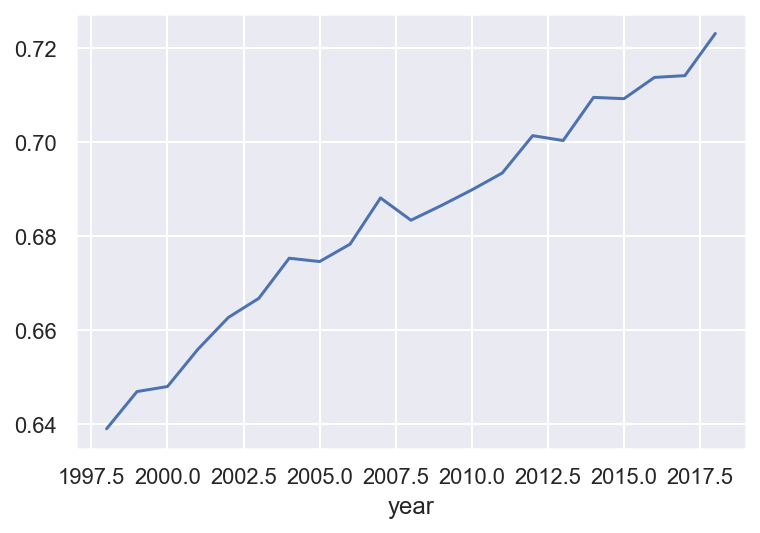

In [803]:
def get_last_letter(name):
    return name[-1]

table['last_letter'] = table.name.map(get_last_letter)

last_letters = table[table.gender == 'w'].pivot_table('births', 'last_letter', 'year', 'sum') 
last_letters = last_letters / last_letters.sum()
last_letters.T['a'].plot()

Popularity of names over time

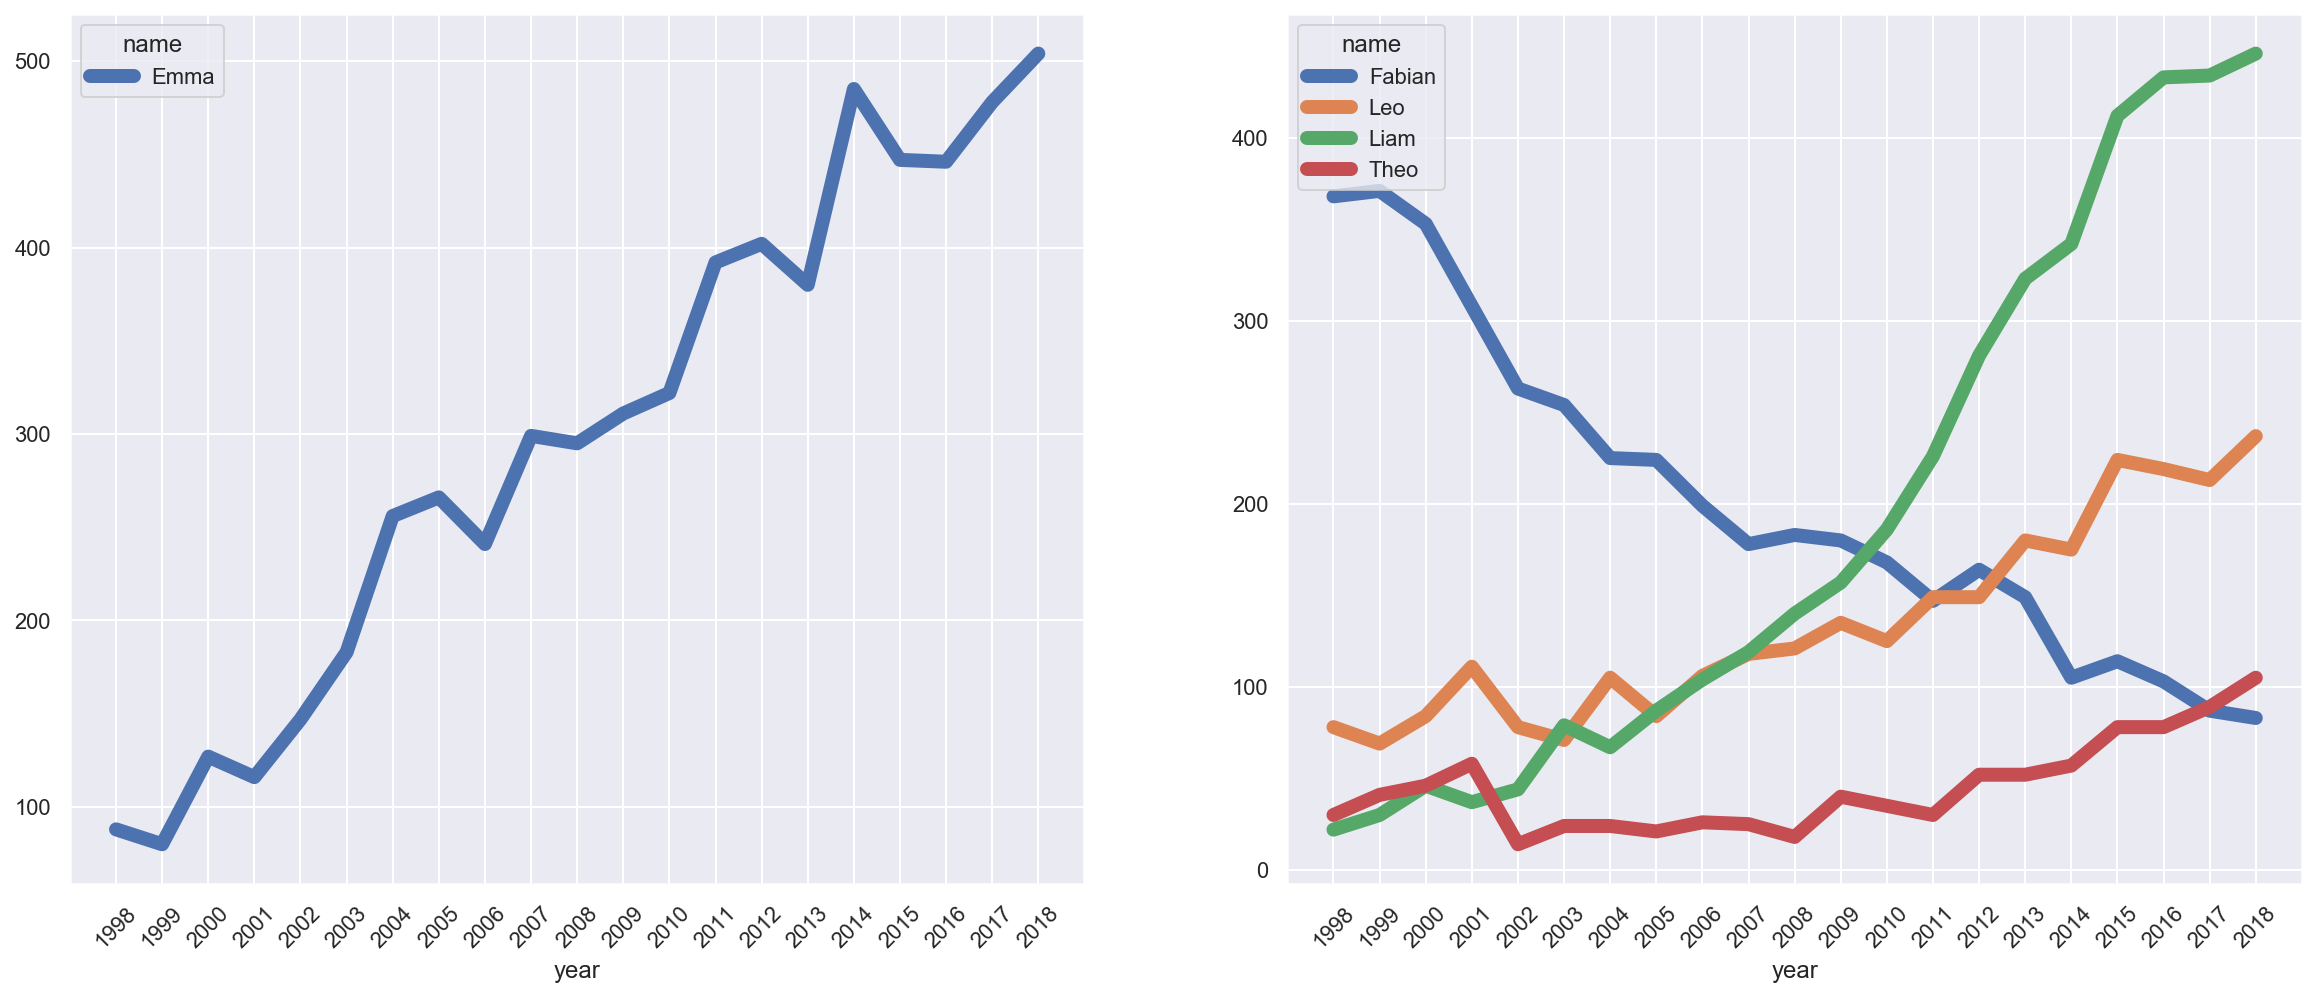

In [21]:
import matplotlib.pyplot as plt

def plot_births(names, axis, values='prop'):
    (table[(table.name.isin(names))]
     .pivot_table(values, 'year', 'name', 'sum')
     .plot(ax=axis, xticks=range(1998, 2019), rot=45, linewidth=7))

    
fig, (left, right) = plt.subplots(1, 2, figsize=(20, 8))

girl_names = ['Emma']
boy_names = ['Liam', 'Leo', 'Theo', 'Fabian']

plot_births(girl_names, left, values='births')
plot_births(boy_names, right, values='births')

# USDA Food database

In [100]:
ls data/usda_foods.json

chap14-examples.ipynb  data/


In [105]:
import json

db = json.load(open('data/usda_foods.json'))
len(db)

In [110]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [112]:
pd.DataFrame(db[0]['nutrients'])

,value,units,description,group
0,25.180,g,Protein,Composition
1,29.200,g,Total lipid (fat),Composition
2,3.060,g,"Carbohydrate, by difference",Composition
3,3.280,g,Ash,Other
4,376.000,kcal,Energy,Energy
...,...,...,...,...
157,1.472,g,Serine,Amino Acids
158,93.000,mg,Cholesterol,Other
159,18.584,g,"Fatty acids, total saturated",Other
160,8.275,g,"Fatty acids, total monounsaturated",Other


Produce df with info variables

In [124]:
info_keys = ['description', 'id', 'manufacturer', 'group']
new_col_names = {'description': 'food', 'group': 'fgroup'}

info = pd.DataFrame(db, columns=info_keys)
info = info.rename(columns=new_col_names)
info.head()

,food,id,manufacturer,fgroup
0,"Cheese, caraway",1008,,Dairy and Egg Products
1,"Cheese, cheddar",1009,,Dairy and Egg Products
2,"Cheese, edam",1018,,Dairy and Egg Products
3,"Cheese, feta",1019,,Dairy and Egg Products
4,"Cheese, mozzarella, part skim milk",1028,,Dairy and Egg Products


Create a df with all the nutrient info for each food

In [125]:
new_col_names = {'description': 'nutrient', 'group': 'ngroup'}

pieces = []

for rec in db:
    nuts = pd.DataFrame(rec['nutrients'])
    nuts['id'] = rec['id']
    pieces.append(nuts)

nutrients = pd.concat(pieces, ignore_index=True)
nutrients = nutrients.rename(columns=new_col_names)
nutrients.head()

,value,units,nutrient,ngroup,id
0,25.18,g,Protein,Composition,1008
1,29.20,g,Total lipid (fat),Composition,1008
2,3.06,g,"Carbohydrate, by difference",Composition,1008
3,3.28,g,Ash,Other,1008
4,376.00,kcal,Energy,Energy,1008


Combine info and nutrient dfs

In [128]:
foods = pd.merge(info, nutrients).drop_duplicates()
foods.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 389354
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   food          375176 non-null  object 
 1   id            375176 non-null  int64  
 2   manufacturer  293054 non-null  object 
 3   fgroup        375176 non-null  object 
 4   value         375176 non-null  float64
 5   units         375176 non-null  object 
 6   nutrient      375176 non-null  object 
 7   ngroup        375176 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


Plot nutrient content by food group

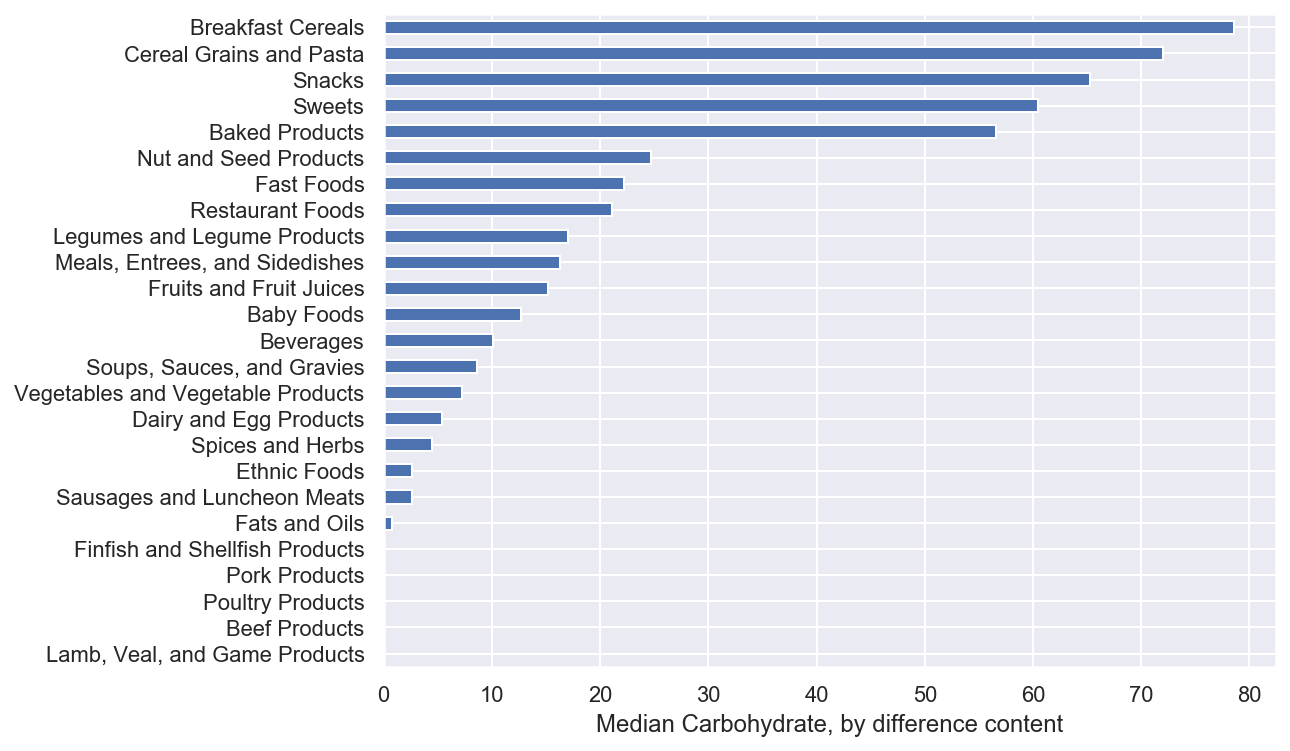

In [170]:
nutrient = 'Carbohydrate, by difference'

(foods[foods.nutrient.isin([nutrient])]
 .groupby('fgroup')
 .value
 .quantile(.5)
 .sort_values()
 .plot(kind='barh', figsize=(8, 6))
 .set(xlabel='Median %s content' % nutrient, ylabel=''));

Find the food with the maxium nutritional content for each nutrient

In [181]:
get_max = lambda x: x.loc[x.value.idxmax()]
foods.groupby('nutrient').apply(get_max).head()

,food,id,manufacturer,fgroup,value,units,nutrient,ngroup
nutrient,,,,,,,,
Adjusted Protein,"Baking chocolate, unsweetened, squares",19078,,Sweets,12.900,g,Adjusted Protein,Composition
Alanine,"Gelatins, dry powder, unsweetened",19177,,Sweets,8.009,g,Alanine,Amino Acids
"Alcohol, ethyl","Alcoholic beverage, distilled, all (gin, rum, ...",14533,,Beverages,42.500,g,"Alcohol, ethyl",Other
Arginine,"Seeds, sesame flour, low-fat",12033,,Nut and Seed Products,7.436,g,Arginine,Amino Acids
Ash,"Desserts, rennin, tablets, unsweetened",19225,,Sweets,72.500,g,Ash,Other


# FEC 2012 presidential election campaign contributions

In [261]:
columns = {'cand_nm':'candidate',
           'contbr_city':'city', 
           'contbr_occupation':'occupation', 
           'contb_receipt_amt':'amount', 
           'contb_receipt_dt':'date'}

parties = {'Bachmann, Michelle': 'r', 
           'Romney, Mitt': 'r', 
           'Obama, Barack': 'd',
           "Roemer, Charles E. 'Buddy' III": 'r', 
           'Pawlenty, Timothy': 'r',
           'Johnson, Gary Earl': 'r', 
           'Paul, Ron': 'r', 
           'Santorum, Rick': 'r',
           'Cain, Herman': 'r',
           'Gingrich, Newt': 'r',
           'McCotter, Thaddeus G': 'r',
           'Huntsman, Jon': 'r', 
           'Perry, Rick': 'r'}

path = 'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/fec/P00000001-ALL.csv'

fec = (pd.read_csv(path)
       [columns.keys()]
       .rename(columns=columns)
       .assign(party = lambda df: df.candidate.map(parties))) 

/Users/fgu/miniconda3/envs/basics/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [262]:
fec.head()

,candidate,city,occupation,amount,date,party
0,"Bachmann, Michelle",MOBILE,RETIRED,250.0,20-JUN-11,r
1,"Bachmann, Michelle",MOBILE,RETIRED,50.0,23-JUN-11,r
2,"Bachmann, Michelle",LANETT,INFORMATION REQUESTED,250.0,05-JUL-11,r
3,"Bachmann, Michelle",PIGGOTT,RETIRED,250.0,01-AUG-11,r
4,"Bachmann, Michelle",HOT SPRINGS NATION,RETIRED,300.0,20-JUN-11,r


Compare total donations

In [258]:
fec.groupby('party').amount.sum()

party
d    1.335026e+08
r    1.652488e+08
Name: amount, dtype: float64

Compare donations by occupation

In [268]:
# Finishing this would take some extra work...
occ_mapping = {'INFORMATION REQUESTED':'Not provided',
               'INFORMATION REQUESTED PER BEST EFFORTS': 'Not provided'}

f = lambda x: occ_mapping.get(x, x)

fec.occupation = fec.occupation.map(f)
fec

,candidate,city,occupation,amount,date,party
0,"Bachmann, Michelle",MOBILE,RETIRED,250.0,20-JUN-11,r
1,"Bachmann, Michelle",MOBILE,RETIRED,50.0,23-JUN-11,r
2,"Bachmann, Michelle",LANETT,Not provided,250.0,05-JUL-11,r
3,"Bachmann, Michelle",PIGGOTT,RETIRED,250.0,01-AUG-11,r
4,"Bachmann, Michelle",HOT SPRINGS NATION,RETIRED,300.0,20-JUN-11,r
...,...,...,...,...,...,...
1001726,"Perry, Rick",INFO REQUESTED,Not provided,5000.0,29-SEP-11,r
1001727,"Perry, Rick",INFO REQUESTED,BUSINESS OWNER,2500.0,30-SEP-11,r
1001728,"Perry, Rick",INFO REQUESTED,Not provided,500.0,29-SEP-11,r
1001729,"Perry, Rick",INFO REQUESTED,LONGWALL MAINTENANCE FOREMAN,500.0,30-SEP-11,r


Discretise donations into buckets for contribution size

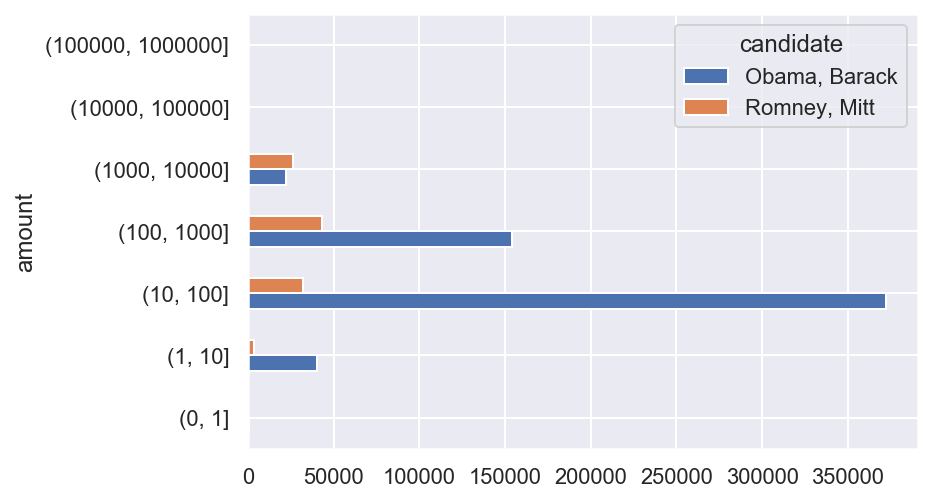

In [282]:
mrbo = fec[fec.candidate.isin(['Obama, Barack', 'Romney, Mitt'])]

bins = np.array([0, 1, 10, 100, 1000, 10000, 100000, 1000000])
labels = pd.cut(mrbo.amount, bins)

mrbo.groupby([labels, 'candidate']).size().unstack().plot(kind='barh')